# WASP_12b

WASP 프로젝트(Wide Angle Search for Planets)는 외계 행성을 찾기 위해 설계된 천문학 프로젝트입니다. 2006년에 시작된 이 프로젝트는 두 개의 관측소를 사용하여 전 세계에서 두 번째로 많은 핫-주피터(Hot-Jupiter) 형태의 외계 행성을 발견했을 정도로 성공적입니다. WASP 남쪽 관측소는 남아프리카에, 북쪽 관측소는 카나리아 제도에 위치해 있습니다.

이 프로젝트의 핵심 목표는 매우 밝은 별 주위를 도는 핫-주피터와 같은 외계 행성을 찾는 것입니다. 이 행성들은 그들의 별 주위를 매우 빠르게 돌기 때문에 (대략 몇 일 정도의 궤도 주기), 통과(transit) 방법을 이용해 발견할 수 있습니다. 통과 방법은 행성이 별 앞을 지나가며 별빛을 일시적으로 약간 어둡게 만드는 현상을 감지하는 기법입니다. 이 정보를 통해 천문학자들은 행성의 크기, 궤도 주기, 그리고 다른 중요한 특성들을 추정할 수 있습니다.

WASP 프로젝트는 전 세계의 다른 많은 관측 프로젝트들과 협력하여, 외계 행성 연구에 중요한 기여를 하고 있습니다. 프로젝트를 통해 발견된 행성들은 종종 더 큰 망원경을 이용한 후속 관측의 대상이 되며, 이를 통해 우리는 외계 행성의 대기, 조성, 기후 등에 대해 더 깊이 이해할 수 있게 됩니다.


**이번 작업의 의미**

FITS (Flexible Image Transport System) 파일은 천문학에서 널리 사용되는 데이터 형식으로, 천체 이미지, 스펙트럼, 광도 등과 같은 천문학적 데이터를 저장하는 데 사용됩니다. FITS 파일을 불러들여 별의 위치와 aperture를 정의한다는 것은 다음과 같은 의미를 갖습니다:


- **별의 위치 정의하기:**
    + 목표 천체 식별: FITS 파일에 포함된 이미지나 데이터에서 관측하고자 하는 별이나 천체를 식별합니다. 이는 보통 좌표, 밝기, 색상 등의 정보를 사용하여 수행됩니다.
    + 위치 좌표 설정: 별의 정확한 위치를 좌표로 나타내기 위해, 천체의 중심을 찾아 그 좌표를 기록합니다. 이 좌표는 후속 분석에 사용됩니다.


- **Aperture 정의하기:**
    + 광도 측정: Aperture는 별이나 천체 주변의 특정 영역을 정의하여, 그 영역 안에서 들어오는 빛의 양을 측정하는 데 사용됩니다. 이를 통해 별의 광도나 다른 천체적 특성을 측정할 수 있습니다.
    + Aperture Photometry: Aperture를 정의한 후, 그 내부의 빛의 총량을 합산하여 광도를 측정합니다. 이 과정을 aperture photometry라고 하며, 별의 밝기, 변광성, 그리고 다른 천체적 특성을 연구하는 데 사용됩니다.


- **프로세스 개요:**
    + FITS 파일 불러오기: 천문학자나 연구자는 관측된 데이터가 담긴 FITS 파일을 소프트웨어를 통해 불러옵니다.
    + 데이터 분석: 파일을 열어 이미지나 데이터를 확인하고, 관심 있는 천체를 식별합니다.
    + 별 위치 식별 및 Aperture 설정: 별의 위치를 정확히 파악하고, 그 주변에 측정할 aperture를 설정합니다.
    + 광도 측정: 설정된 aperture를 사용하여 별이나 천체의 광도를 측정합니다.
      
**Reference**

- https://github.com/laingmic005/aperture-photometry/blob/main/L4_light-curve-modeling.ipynb

- https://www.youtube.com/watch?v=HOJu2kR9Ll4&t=451s

- https://www.astro.louisville.edu/software/astroimagej/examples/

In [1]:
import os 
os.getcwd()

'/Users/younghokim/astro/prj2_WASP'

In [2]:
# FITS 파일을 불러오기 위한 경로 리스트 만들기 

from astropy.io import fits

fits_files = []

for i in range(40, 100, 1):
    fits_files.append(f'WASP-12b/WASP-12b_000{i}_bsdf.fits')


for i in range(100, 270, 1):
    fits_files.append(f'WASP-12b/WASP-12b_00{i}_bsdf.fits')

In [3]:
print(f'{fits_files[0:5]}' + "...")

['WASP-12b/WASP-12b_00040_bsdf.fits', 'WASP-12b/WASP-12b_00041_bsdf.fits', 'WASP-12b/WASP-12b_00042_bsdf.fits', 'WASP-12b/WASP-12b_00043_bsdf.fits', 'WASP-12b/WASP-12b_00044_bsdf.fits']...


In [4]:
# Fits 파일 모으기 

fits_data=[]

for fits_file in fits_files:
    file_data = fits.open(fits_file)
    image_data = file_data[0].data

    fits_data.append(image_data)

print(fits_data[0:5])

[array([[1240, 1253, 1250, ..., 1204, 1260, 1205],
       [1274, 1221, 1207, ..., 1177, 1171, 1203],
       [1244, 1217, 1227, ..., 1217, 1254, 1193],
       ...,
       [1233, 1245, 1188, ..., 1228, 1254, 1221],
       [1254, 1197, 1260, ..., 1183, 1264, 1238],
       [1273, 1231, 1236, ..., 1229, 1237, 1213]], dtype=uint16), array([[1289, 1211, 1242, ..., 1213, 1209, 1172],
       [1235, 1264, 1251, ..., 1201, 1221, 1198],
       [1233, 1217, 1203, ..., 1193, 1187, 1208],
       ...,
       [1249, 1215, 1240, ..., 1228, 1191, 1235],
       [1293, 1262, 1247, ..., 1169, 1178, 1203],
       [1270, 1216, 1204, ..., 1207, 1151, 1213]], dtype=uint16), array([[1323, 1211, 1250, ..., 1209, 1195, 1185],
       [1262, 1231, 1219, ..., 1178, 1130, 1148],
       [1296, 1278, 1228, ..., 1136, 1201, 1216],
       ...,
       [1279, 1194, 1236, ..., 1195, 1188, 1221],
       [1245, 1192, 1173, ..., 1196, 1208, 1185],
       [1261, 1272, 1218, ..., 1216, 1167, 1219]], dtype=uint16), array([[1318, 1

In [5]:
image_data

array([[1705, 1586, 1616, ..., 1630, 1657, 1606],
       [1686, 1628, 1682, ..., 1622, 1627, 1628],
       [1657, 1637, 1670, ..., 1618, 1605, 1649],
       ...,
       [1645, 1566, 1611, ..., 1623, 1676, 1707],
       [1673, 1616, 1663, ..., 1675, 1630, 1646],
       [1620, 1638, 1625, ..., 1676, 1669, 1676]], dtype=uint16)

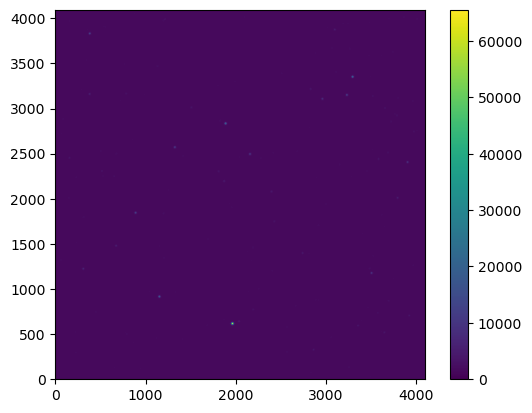

In [6]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(image_data, origin = 'lower')
plt.colorbar()
plt.show()

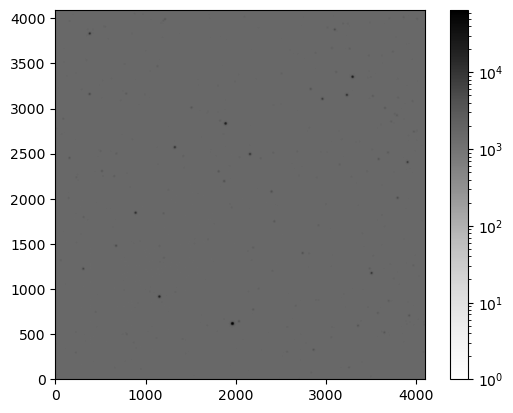

In [7]:
from matplotlib.colors import LogNorm

plt.figure()
plt.imshow(image_data, origin = 'lower', cmap = 'Greys', norm = LogNorm())
plt.colorbar()
plt.show()

In [8]:
# find mean, median and standard deviation

from astropy.stats import sigma_clipped_stats

mean, median, std = sigma_clipped_stats(image_data, sigma = 3.0)

print((mean, median, std))


(1598.5210559508812, 1598.0, 36.48392655692903)


In [9]:
# DAOstarfinder를 이용한 별 찾기 

from photutils.detection import DAOStarFinder

# 별 찾는 규칙 정하기 
# 1. 반전치폭 FWHM을 약 3 pixels로 설정
# 2. std의 5배 이상의 밝기부터 별을 찾기

daofind = DAOStarFinder(fwhm = 3.0, threshold = 5.0*std)

# 소스 테이블 생성 
sources = daofind(image_data - median)
sources_backup = daofind(image_data - median)

In [10]:
type(sources)

astropy.table.table.QTable

In [11]:
sources.info

<QTable length=228>
   name     dtype 
---------- -------
        id   int64
 xcentroid float64
 ycentroid float64
 sharpness float64
roundness1 float64
roundness2 float64
      npix   int64
       sky float64
      peak float64
      flux float64
       mag float64

In [12]:
sources.round(2)

In [13]:
sources.pprint()

 id xcentroid ycentroid sharpness roundness1 ... npix sky  peak  flux  mag 
--- --------- --------- --------- ---------- ... ---- --- ------ ---- -----
  1   3913.62     11.97      0.53      -0.14 ...   25 0.0  356.0 1.54 -0.47
  2   1487.91    267.89      0.69        0.1 ...   25 0.0  159.0  1.0  -0.0
  3    229.81    294.92      0.54      -0.08 ...   25 0.0 1089.0 1.03 -0.03
  4   2859.68     325.0      0.57       0.23 ...   25 0.0 2739.0 1.32  -0.3
  5    2861.7    325.24      0.25       0.35 ...   25 0.0 2897.0 1.56 -0.48
  6    2861.3    326.25      0.42      -0.11 ...   25 0.0 2989.0 1.56 -0.48
  7   4021.01    365.29      0.57       0.43 ...   25 0.0  163.0 1.07 -0.07
...       ...       ...       ...        ... ...  ... ...    ...  ...   ...
222   3095.32   3870.45      0.35       0.36 ...   25 0.0 4286.0 2.35 -0.93
223   3098.07   3871.16      0.56      -0.23 ...   25 0.0 3825.0 1.61 -0.52
224   3095.83   3874.81      0.36       0.04 ...   25 0.0 3220.0 1.59  -0.5
225   1531.3

In [14]:
sources_backup.pprint()

 id     xcentroid      ...        flux                 mag          
--- ------------------ ... ------------------ ----------------------
  1  3913.621106215675 ...  1.536508680836504   -0.46633754559869856
  2 1487.9060342958676 ... 1.0015541012227118 -0.0016860341685590054
  3 229.81261815618038 ...  1.025085805132828  -0.026900549177081685
  4 2859.6848669833284 ... 1.3184349127945874    -0.3001467370834529
  5 2861.7021297057195 ... 1.5557222350353384   -0.47983014718715944
  6 2861.2975248853727 ...   1.55861105095765    -0.4818443779372257
  7 4021.0134750719308 ...   1.06593667897235    -0.0693285164410025
...                ... ...                ...                    ...
222 3095.3248671150373 ... 2.3513188328466024    -0.9282788058595569
223  3098.074350128096 ... 1.6097840403423784    -0.5169190435291348
224 3095.8253053366648 ... 1.5885833952441286    -0.5025250468749628
225 1531.3604018909355 ... 1.0450436745367948   -0.04783610222767319
226  1215.583569461958 ... 1.08932

In [15]:
sources.colnames

['id',
 'xcentroid',
 'ycentroid',
 'sharpness',
 'roundness1',
 'roundness2',
 'npix',
 'sky',
 'peak',
 'flux',
 'mag']

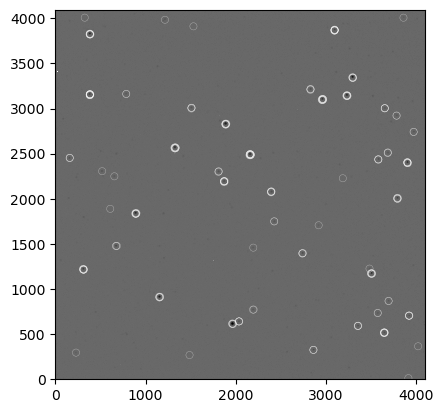

In [16]:
# 필요한 패키지 임포트 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from photutils.aperture import CircularAperture

# 1. sources 테이블을 이용 별의 위치를 선정 
# 2. 각각의 별의 위치 마다 구경(aperture)을 그려주기 (반지름은 5)
# 3. matplotlib을 이용하여 전체 그림 그려주기 

positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
apertures = CircularAperture(positions, r = 40.0)

plt.imshow(image_data, cmap = 'Greys', origin = 'lower', 
           norm = LogNorm(), interpolation = 'nearest')

# 별의 구경(aperture) 그리기 (색상, 선 두께, 투명도) 
apertures.plot(color = 'white', lw = 0.3, alpha = 0.5);

In [17]:
'''find_peaks를 이용해 별상의 피크 찾기'''

from astropy.stats import sigma_clipped_stats
from photutils.detection import find_peaks

# 평균, 중간값, 표준편차 정하기 
mean, median, std = sigma_clipped_stats(image_data, sigma = 3.0)

print((mean, median, std))

(1598.5210559508812, 1598.0, 36.48392655692903)


In [18]:
# Threshold 설정 

threshold = median + (5.0*std)

In [19]:
# 피크값에 대한 테이블 설정 

tbl = find_peaks(image_data, threshold, box_size = 11)
tbl['peak_value'].info.format = '%8g'
print(tbl)

x_peak y_peak peak_value
------ ------ ----------
  2944      0       1794
  2702      8       1824
  3914     15       2415
  2484     18       1861
  3497     28       2136
  1539     33       1799
  2498     33       1786
   ...    ...        ...
  3289   4021       1788
  3911   4021       1801
   198   4024       1798
   976   4039       1925
   877   4045       2027
  2644   4090       1816
  3781   4094       1932
Length = 620 rows


In [20]:
# 피크 지점 시각화를 위한 peak 포인트 포지셔닝 및 구경(aperture) 작성

peak_positions = np.transpose((tbl['x_peak'], tbl['y_peak']))
peak_positions

array([[2944,    0],
       [2702,    8],
       [3914,   15],
       ...,
       [ 877, 4045],
       [2644, 4090],
       [3781, 4094]])

In [21]:
peak_apertures = CircularAperture(peak_positions, r = 80.0)

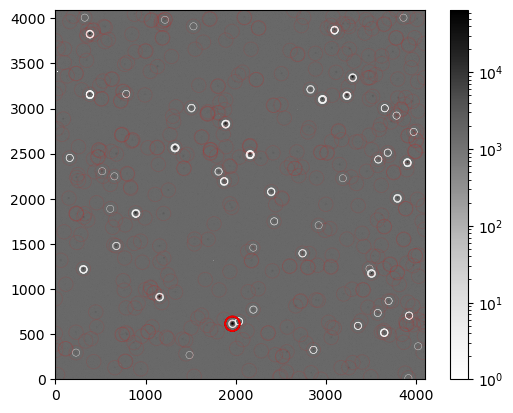

In [22]:
# matplotlib를 이용한 시각화

plt.figure()
plt.imshow(image_data, cmap = 'Greys', origin = 'lower', norm = LogNorm(),
           interpolation = 'nearest')
plt.colorbar()
apertures.plot(color = 'white', lw = 0.3, alpha = 0.8);
peak_apertures.plot(color = 'red', lw = 0.6, alpha = 0.1);

In [23]:
selected_position = [2401.93, 2086.15]
selected_apertures = CircularAperture(selected_position, r = 100.0)

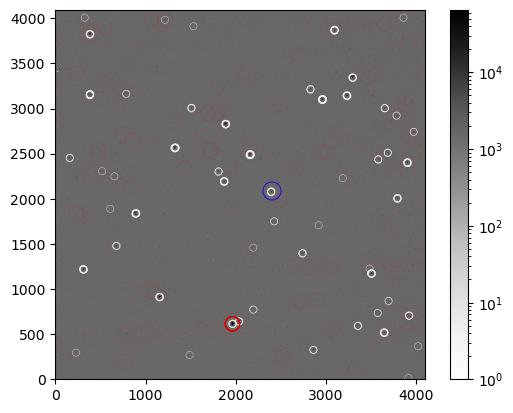

In [24]:
plt.imshow(image_data, cmap = 'Greys', origin = 'lower', norm = LogNorm(),
           interpolation = 'nearest')
plt.colorbar()
apertures.plot(color = 'white', lw = 0.3, alpha = 0.8);
peak_apertures.plot(color = 'red', lw = 0.1, alpha = 0.3);
selected_apertures.plot(color = 'blue', lw = 0.6, alpha = 1);

파란색으로 표시된 지역의 광도 변화를 살펴보고자 함

In [25]:
# file_data[0].header

In [26]:
# 별의 위치와 구역 정하기

from photutils.aperture import CircularAperture

position = [2401.93, 2086.15]
aperture = CircularAperture(position, r = 10.0)

In [27]:
# 각 FITS 파일에서 설정한 위치의 aperture 내의 광량 합을 계산 
from photutils.aperture import aperture_photometry
star_data = [] 

for file in fits_data:
    star_data.append(aperture_photometry(file, aperture)['aperture_sum'])
    
print(star_data[0:5])

[<Column name='aperture_sum' dtype='float64' length=1>
1378985.3649930172, <Column name='aperture_sum' dtype='float64' length=1>
1166119.1710529984, <Column name='aperture_sum' dtype='float64' length=1>
922570.5368153333, <Column name='aperture_sum' dtype='float64' length=1>
1038883.4002751422, <Column name='aperture_sum' dtype='float64' length=1>
1220957.0887624202]


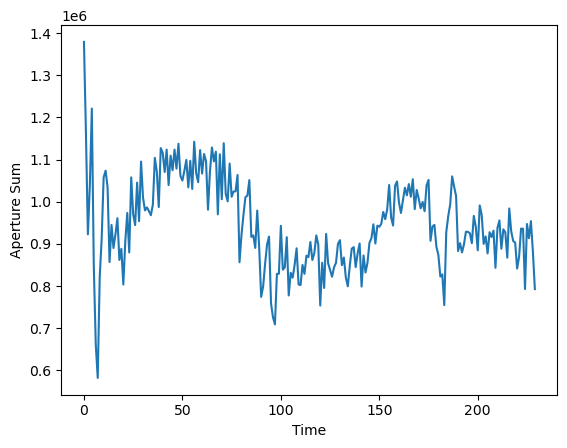

In [28]:
# aperture_sum 그리기 

plt.plot(star_data)
plt.ylabel('Aperture Sum')
plt.xlabel('Time')
plt.show()

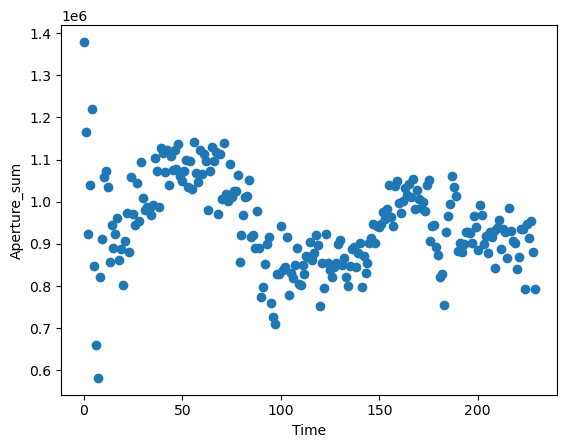

In [29]:
# O 마크로 그리기 
plt.plot(star_data, 'o')
plt.ylabel("Aperture_sum")
plt.xlabel("Time")
plt.show()

다른 위치에 대해서도 그려보기

In [30]:
import numpy as np

print(np.argmin(sources['mag']))
sel_row = np.argmin(sources['mag'])
select_data = sources[sel_row]
select_data

23


id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64
24,1962.64,618.57,0.54,0.81,-0.79,25,0.0,63937.0,46.15,-4.16


In [31]:
# 별의 위치와 구역 바꿔보기

from photutils.aperture import CircularAperture

new_position = np.transpose((select_data['xcentroid'], select_data['ycentroid']))
new_aperture = CircularAperture(new_position, r = 100.0)

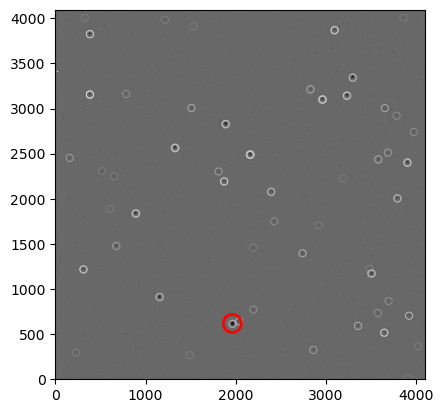

In [32]:
plt.imshow(image_data, cmap = 'Greys', norm = LogNorm(), origin = 'lower', 
           interpolation = 'nearest')
apertures.plot(color = 'white', lw = 0.3, alpha = 0.3);
new_aperture.plot(color = 'red', lw = 2.0, alpha = 1.0);

In [33]:
# 같은 aperture 크기를 비교하기 위해 다시 r = 10.0으로 설정

new_aperture_adj = CircularAperture(new_position, r = 10.0)

In [34]:
# new_aperture_adj의 광량의 합을 계산 

from photutils.aperture import aperture_photometry
star_data_new = []

for file in fits_data:
    star_data_new.append(aperture_photometry(file, new_aperture_adj)['aperture_sum'])

print(star_data_new[0:5])

[<Column name='aperture_sum' dtype='float64' length=1>
10314138.882656094, <Column name='aperture_sum' dtype='float64' length=1>
12589651.053314347, <Column name='aperture_sum' dtype='float64' length=1>
11027356.761637745, <Column name='aperture_sum' dtype='float64' length=1>
11070908.822890945, <Column name='aperture_sum' dtype='float64' length=1>
12436146.926984336]


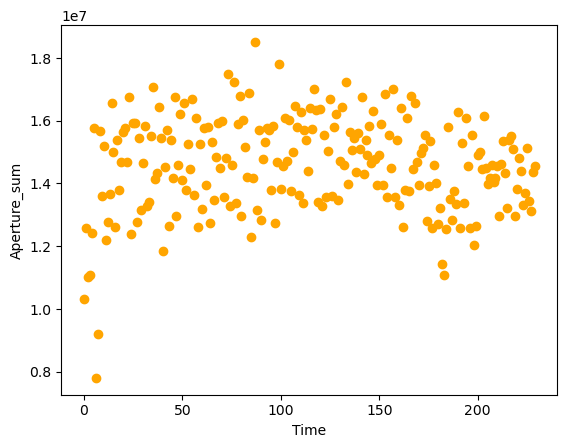

In [35]:
# matplotlib으로 그리기 

plt.plot(star_data_new, "o", color = "orange")
plt.ylabel("Aperture_sum")
plt.xlabel("Time")
plt.show()

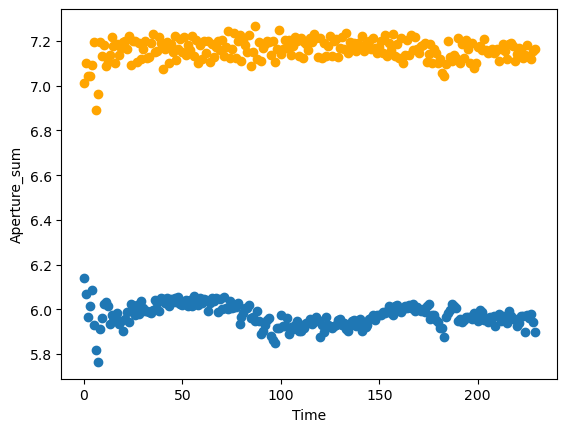

In [36]:
# matplotlib으로 그리기 

plt.plot(np.log10(star_data_new), "o", color = "orange")
plt.plot(np.log10(star_data), "o")
plt.ylabel("Aperture_sum")
plt.xlabel("Time")
plt.show()

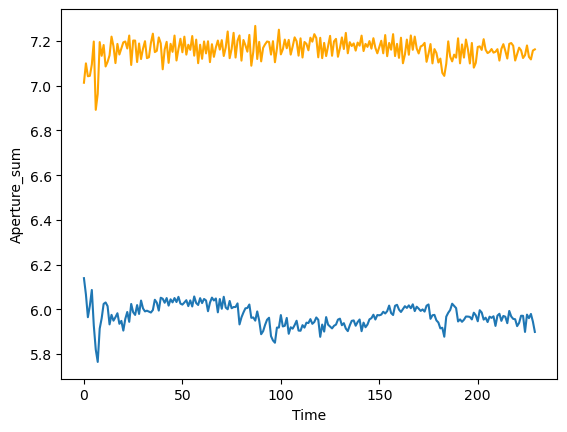

In [37]:
# matplotlib으로 그리기 

plt.plot(np.log10(star_data_new), color = "orange")
plt.plot(np.log10(star_data))
plt.ylabel("Aperture_sum")
plt.xlabel("Time")
plt.show()

In [38]:
print(len(star_data))
print(len(star_data_new))

230
230


In [40]:
import pandas as pd

type(star_data)
pd.Series(star_data)

0      [1378985.3649930172]
1      [1166119.1710529984]
2       [922570.5368153333]
3      [1038883.4002751422]
4      [1220957.0887624202]
               ...         
225     [947215.5057646673]
226     [913579.1153961006]
227     [953999.5945715026]
228     [881899.4840843616]
229     [792816.2780921229]
Length: 230, dtype: object

In [41]:
import pandas as pd

df = pd.DataFrame({"star1" : pd.Series(star_data), 
                   "star2" : pd.Series(star_data_new)})

df.head()

,star1,star2
0,[1378985.3649930172],[10314138.882656094]
1,[1166119.1710529984],[12589651.053314347]
2,[922570.5368153333],[11027356.761637745]
3,[1038883.4002751422],[11070908.822890945]
4,[1220957.0887624202],[12436146.926984336]


In [42]:
df["star1"].corr(df.star2)

-0.05528769277438832

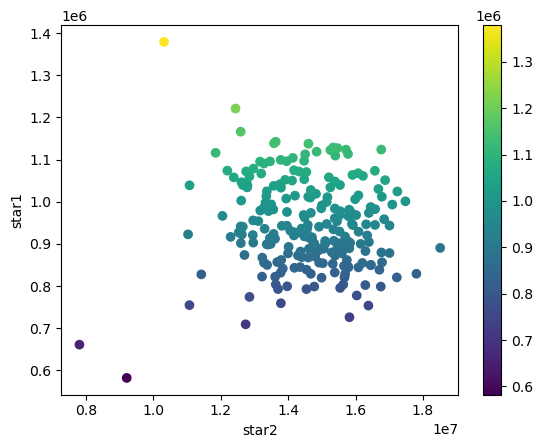

In [43]:
plt.scatter(df['star2'], df['star1'], c = df['star1'], cmap = 'viridis')
plt.ylabel("star1")
plt.xlabel("star2")
plt.colorbar()

# plt.grid(True)
plt.show()

Q1) 별들 간 aperture_sum 광도 변화의 상관관계가 높은 별이 있을까? 

이것을 알려면 어떻게 찾아낼 수 있을 까?

1. DAOFinder로 찾은 별의 위치별로 aperture를 설정
2. 별마다 230장의 fits data에서 aperture_sum을 계산
3. 228개의 별 -> column, 230 개 사진에서 얻은 apertrure sum의 값이 row가 되도록 Data Frame 생성
4. Data Frame의 correlation plot 그리기
5. 그리고 correlation coef 값을 내림차순으로 sorting하여 최대값부터 10가 순위를 선정
6. 각 선정한 10개 pair에 대한 correlation plot 그리기

우리가 알고 있는 변광성과 주기가 같은 변광성을 찾는 방법

Q2) 새로운 변광성이 있는지 알 수 있는 방법이 있을까?

1. DAOFinder로 찾은 별의 위치별로 aperture를 설정
2. 별마다 230장의 fits data에서 aperture_sum을 계산
3. 228개의 별 -> column, 230 개 사진에서 얻은 apertrure sum의 값이 row가 되도록 Data Frame 생성
4. 주기함수 모델에 fitting하고 error_sum(RMS, RMSE 등 regression 측정 지표 확인)
5. 228개의 모델에 대해 RMSE가 낮은 순서로 오름 차순 정렬
6. 각각의 Fitting 결과 확인 => 주기성을 나타내는 데이터 확인

Q3) 그렇다면 주기함수를 이용해서 찾는 방법 외에 다른 방법으로 새로운 변광성이 있는지 알 수 있는 방법이 있을까?

1. DAOFinder로 찾은 별의 위치별로 aperture를 설정
2. 별마다 230장의 fits data에서 aperture_sum을 계산
3. 228개의 별 -> column, 230 개 사진에서 얻은 apertrure sum의 값이 row가 되도록 Data Frame 생성
4. 시계열 정상성, 자기회귀성 확인, 절단점 이용 평균, 분산 비교 등 시계열 EDA 적용
5. 이 중 비정상성을 나타내거나, 자기회귀성을 나타내거나, 절단점 전후의 통계량 차이가 큰 별 확인
6. 대상 별들에 대한 traind time section과 test time section 분리(data split)
8. 시계열 머신러닝 모델, transformer 모델 등에 fitting하고 error_sum(RMS, RMSE 등) 측정 지표 확인
9. 228개의 모델에 대해 RMSE가 낮은 순서로 오름 차순 정렬
10. 각각의 Fitting 결과 확인 => 주기성을 나타내는 데이터 확인